In [1]:
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
include("intro.jl")

using GraphPlot
using HNProcess
using DataRefine
using PartitioningData

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [2]:
#= template

image = [
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
] 
=#

i1 = [
    -1 1 1 1 1 1 1 1 1 -1;
    1 -1 1 1 1 1 1 1 -1 1;
    1 1 -1 1 1 1 1 -1 1 1;
    1 1 1 -1 1 1 -1 1 1 1;
    1 1 1 1 -1 -1 1 1 1 1;
    1 1 1 1 -1 -1 1 1 1 1;
    1 1 1 -1 1 1 -1 1 1 1;
    1 1 -1 1 1 1 1 -1 1 1;
    1 -1 1 1 1 1 1 1 -1 1;
    -1 1 1 1 1 1 1 1 1 -1;
] 

i2 = [
    -1 1 1 1 -1 -1 1 1 1 -1;
    1 1 1 1 -1 -1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    -1 1 1 1 1 1 1 1 1 -1;
    -1 1 1 1 1 1 1 1 1 -1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 -1 -1 1 1 1 1;
    -1 1 1 1 -1 -1 1 1 1 -1;
] 

i3 = [
    -1 -1 1 1 1 1 1 1 -1 -1;
    -1 -1 1 1 1 1 1 1 -1 -1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    -1 -1 1 1 1 1 1 1 -1 -1;
    -1 -1 1 1 1 1 1 1 -1 -1;
] 

10×10 Matrix{Int64}:
 -1  -1  1  1  1  1  1  1  -1  -1
 -1  -1  1  1  1  1  1  1  -1  -1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
 -1  -1  1  1  1  1  1  1  -1  -1
 -1  -1  1  1  1  1  1  1  -1  -1

In [9]:

# Take image matrix and turn it into a vector with the rows being coancenated at their endpoints
# ex: [row1,row2,row3]

sim_time = 2
steps = 750
parameters = Dict{String, Any}(
    "images" => [i1,i2],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 1, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,-1)]
)

Dict{String, Any} with 8 entries:
  "images"          => [[-1 1 … 1 -1; 1 -1 … -1 1; … ; 1 -1 … -1 1; -1 1 … 1 -1…
  "scaling"         => 1.0
  "iterations"      => 1
  "steps"           => 750
  "num_agitations"  => 1
  "initial_stimuli" => [(1, 1, -1)]
  "sim_time"        => 2
  "delta"           => -0.00266667

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweightedgraph.jl:182


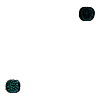

In [4]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [4]:
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "10by10","len2")

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweightedgraph.jl:182


┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┤
│     -1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │      -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│     -1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      -1 │
│     -1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      -1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      

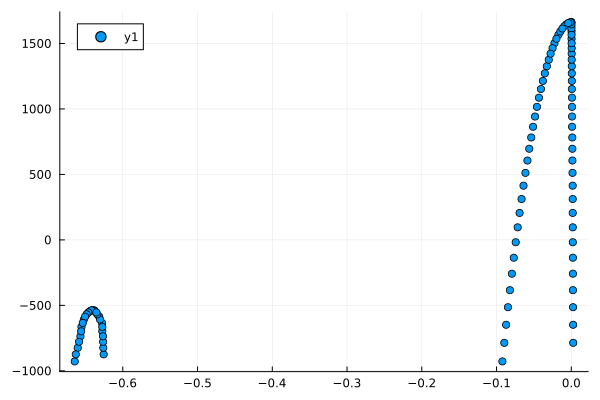

In [5]:
HN_cut_plotter(parameters, res[1])

In [11]:
rots = iterative_rotater_state(res[1], parameters);
for st in rots
    if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])

        println("FOUND")
        pretty_table(reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
end

LoadError: UndefVarError: `res` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [12]:
r = HN_Solver(parameters)

pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))

conv = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_Solver(parameters)
        if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┤
│     -1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │      -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│     -1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      -1 │
│     -1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      -1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      

In [5]:
r = HN_og(parameters)

pretty_table(reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)))
conv = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┤
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │       1 │
│     -1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      -1 │
│     -1 │     -1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │      1 │     -1 │     -1 │     -1 │     -1 │      